### Esercizio 4 lezione 9 del 22 ottobre 2020  



##### <span style="color:red"> Il dataframe </span>
Il dataset si riferisce ai matrimoni celebrati a Milano per anno dell'evento, dal 2003 in poi.
<p>In particolare questo dataframe è disponibile sul sito del comune di Milano, i dati raccolti al suo interno sono stati collezionati a partire dal primo gennaio del 2003 fino al 31 dicembre 2019 e sono stati aggiornati annualmente. </p>

Cliccare qui andare al sito degli [Open data del comune di Milano](https://dati.comune.milano.it/).


###### <span style="color:red"> Le variabili </span>
I matrimoni sono classificati secondo variabili relative all'evento (luogo del matrimonio, tipo di rito), e variabili relative ai due sposi (residenza, stato civile precedente il matrimonio, cittadinanza, età).
<p> La variabile 'numerosità' si riferisce a quante persone si sono sposate con le stesse caratteristiche. </p>

In [2]:
#importo le librerie
import numpy as np
import pandas as pd

#importo il file csv
data =pd.read_csv(r"C:\Users\Laura\Desktop\PythonDataScienceHandbook-master\notebooks\data\matrimoni_unioni_civili.csv")

#cancello la colonna '_id' in quanto jupyter notebook al momento dell'importazione del file csv ne crea una identica
data.drop('_id', inplace=True, axis=1)

#visualizzo il dataframe
data

,Anno_evento,Luogo_matrimonio,Rito,Residenza_marito,Residenza_moglie,Stato_civile_marito,Stato_civile_moglie,Cittadinanza_marito,Cittadinanza_moglie,Eta_marito,Eta_moglie,Numerosità
0,2003,Milano,Cattolico,Milano,Italia,Celibe,Nubile,Italia,Italia,31.0,23.0,1
1,2003,Milano,Cattolico,Milano,Italia,Celibe,Nubile,Italia,Italia,31.0,24.0,1
2,2003,Milano,Cattolico,Milano,Italia,Celibe,Nubile,Italia,Italia,31.0,29.0,5
3,2003,Milano,Cattolico,Milano,Italia,Celibe,Nubile,Italia,Italia,31.0,30.0,1
4,2003,Milano,Cattolico,Milano,Italia,Celibe,Nubile,Italia,Italia,31.0,31.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...
43532,2019,Milano,Geova,Milano,Italia,Divorziato o già coniugato,Vedova,Moldova,Romania,38.0,37.0,1
43533,2019,Milano,Geova,Milano,Milano,Celibe,Nubile,Italia,Italia,25.0,28.0,1
43534,2019,Milano,Geova,Milano,Milano,Celibe,Nubile,Italia,Italia,28.0,31.0,1
43535,2019,Milano,Geova,Milano,Milano,Celibe,Nubile,Italia,Italia,30.0,30.0,1


###### <span style="color:red"> L'analisi dei dati </span>
<p> Creiamo due mask di valori booleani rispetto alle condizioni se il rito è cattolico o civile, dopo di chè andremo a confrontare con delle misure statistiche quali sono la media,il massimo e il minimo del'età con cui le  persone si sono sposate, dopodichè andremo ad analizzare in particolare l'età media sia in generale che suddivisa per rito e anno</p>


In [3]:
mask_cattolico= data['Rito'] == 'Cattolico'

In [4]:
mask_civile= data['Rito'] == 'Civile'

>Andiamo a calcolare il numero di persone e lo inseriamo nella variabile 'persone', in quanto la variabile numerosità è espressa per numero di coppie ( quindi numerosità = 1 significa una coppia e quindi due persone ).
> <p>Dopodichè inseriemo la variabile nel dataframe per semplificare i calcoli successivi</p>

In [5]:
persone=data['Numerosità']*2
data['Numero_Persone']= persone
data.head()

,Anno_evento,Luogo_matrimonio,Rito,Residenza_marito,Residenza_moglie,Stato_civile_marito,Stato_civile_moglie,Cittadinanza_marito,Cittadinanza_moglie,Eta_marito,Eta_moglie,Numerosità,Numero_Persone
0,2003,Milano,Cattolico,Milano,Italia,Celibe,Nubile,Italia,Italia,31.0,23.0,1,2
1,2003,Milano,Cattolico,Milano,Italia,Celibe,Nubile,Italia,Italia,31.0,24.0,1,2
2,2003,Milano,Cattolico,Milano,Italia,Celibe,Nubile,Italia,Italia,31.0,29.0,5,10
3,2003,Milano,Cattolico,Milano,Italia,Celibe,Nubile,Italia,Italia,31.0,30.0,1,2
4,2003,Milano,Cattolico,Milano,Italia,Celibe,Nubile,Italia,Italia,31.0,31.0,6,12


> Raggruppiamo il dataframe per anno e per rito andando a sommare il numero di persone raggruppate in quella specifica categoria.
> <p> Teniamo la colonna Numerosità solo per una questione di controllo di correttezza dei risultati </p>

In [6]:
data_grouped=data.groupby(['Anno_evento','Rito'])['Numero_Persone', 'Numerosità'].sum()
data_grouped

<ipython-input-6-12906996850a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_grouped=data.groupby(['Anno_evento','Rito'])['Numero_Persone', 'Numerosità'].sum()


Numero_Persone  Numerosità
Anno_evento Rito                                  
2003        Cattolico             4196        2098
            Civile                4324        2162
            Geova                    8           4
2004        Altri Riti               4           2
            Cattolico             3676        1838
...                                ...         ...
2019        Altri Riti              20          10
            Cattolico             1270         635
            Civile                4594        2297
            Evangelico               6           3
            Geova                   28          14

[92 rows x 2 columns]

> Calcoliamo l'età media generale degli uomini e delle donne che si sono sposate negli anni presi in considerazione ovvero dal  2003 fino al 2019

In [7]:
#media delle età delle persone che si sono sposate in generale
print("L'età media delle donne che si sono sposate fra il 2003 e il 2019 è pari a",np.mean(data['Eta_moglie']), " \nmentre l'età media degli uomini che si sono sposati fra il 2003 e il 2019 è pari a",np.mean(data['Eta_marito'], axis=0) )
print("\nL'età più alta in cui una donna che si è sposata fra il 2003 e il 2019 è pari a",np.max(data['Eta_moglie']),"anni" " \nmentre l'età più alta per gli uomini è pari ad anni",np.max(data['Eta_marito'],axis=0) )
print("\nL'età più bassa in cui una donna che si è sposata fra il 2003 e il 2019 è pari a",np.min(data['Eta_moglie']), " \nmentre l'età più basssa per gli uomini è pari a",np.min(data['Eta_marito'], axis=0) )


L'età media delle donne che si sono sposate fra il 2003 e il 2019 è pari a 36.581370769478205  
mentre l'età media degli uomini che si sono sposati fra il 2003 e il 2019 è pari a 40.33134979896611

L'età più alta in cui una donna che si è sposata fra il 2003 e il 2019 è pari a 91.0 anni 
mentre l'età più alta per gli uomini è pari ad anni 99.0

L'età più bassa in cui una donna che si è sposata fra il 2003 e il 2019 è pari a 16.0  
mentre l'età più basssa per gli uomini è pari a 18.0


> Troviamo l'età media suddivisa per ogni rito senza distinzione di anno partendo da:
> 1. la media dell'età degli uomini e delle donne che si sono sposate diversificata per riti senza distinzione di anno
> 2. la media dell'età degli uomini e delle donne che si sono sposate diversificata per riti nei diversi anni


In [8]:
#media delle età delle persone che si sono sposate con i vari riti
eta_media=data.groupby('Rito').mean()
eta_media
eta_media.drop(['Anno_evento', 'Numerosità','Numero_Persone'],inplace=True, axis=1)
eta_media

,Eta_marito,Eta_moglie
Rito,,
Altri Riti,35.960784,32.872549
Cattolico,35.397665,32.636788
Civile,42.116455,38.011206
Evangelico,36.927273,33.272727
Geova,31.457143,29.257143
Israelita,36.900000,34.250000


> Andiamo a guardare la medià di età fra i diversi anni perchè ci interessa vedere se c'è stato un effettivo cambiamento negli anni di questo dato

In [9]:
#media dell'età delle persone che si sono sposate nei diversi anni
eta_media_anni=data.groupby(['Anno_evento','Rito']).mean()
eta_media_anni.drop(['Numerosità','Numero_Persone'],inplace=True, axis=1)
eta_media_anni

Eta_marito  Eta_moglie
Anno_evento Rito                              
2003        Cattolico    34.078721   31.134236
            Civile       39.413868   35.154221
            Geova        33.250000   30.250000
2004        Altri Riti   37.500000   36.500000
            Cattolico    34.435504   31.422194
...                            ...         ...
2019        Altri Riti   35.500000   34.900000
            Cattolico    36.681034   33.732759
            Civile       44.585296   40.558866
            Evangelico   41.666667   34.000000
            Geova        28.071429   28.785714

[92 rows x 2 columns]

#####  <span style="color:red">GRAFICI TENDENZE MATRIMONI </span>


<p> Per poter riuscire a capire meglio l'andamento dei matrimoni nel corso degli anni abbiamo deciso di utilizzare dei grafici</p>

In [10]:
#Importazione librerie
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

> Iniziamo a guardare l'andamento dei matrimoni in generale negli anni

In [11]:
#raggruppo per anno e conto le persone sposate per ogni anno
data_grouped2=data.groupby(['Anno_evento'])['Numero_Persone', 'Numerosità'].sum()
#cancello la colonna Numerosità in quanto non ci serve 
data_grouped2.drop('Numerosità',inplace=True, axis=1)
data_grouped2

<ipython-input-11-264e78a0d4c0>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_grouped2=data.groupby(['Anno_evento'])['Numero_Persone', 'Numerosità'].sum()


,Numero_Persone
Anno_evento,
2003,8528
2004,8200
2005,8096
2006,7690
2007,7918
2008,7760
2009,6722
2010,5780
2011,5818


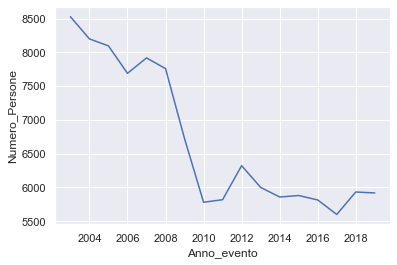

In [12]:
#creo il grafico 
seaborn.lineplot(data=data_grouped2, x='Anno_evento', y='Numero_Persone');

> <p> Si può notare che con il passare degli anni matrimoni di qualunque tipo sono calati.</p>
> <p> In particolare possiamo notare che a partire dal 2008 la 'curva' della quantità di persone che si sposano cala rapidamente</p>

Prendiamo in considerazione i riti prevalenti e analizziamo grazie ai grafici l'andamento dei matrimoni

In [13]:
#dataframe per le persone sposate con rito cattolico e con rito civile
cattolici = data.loc[(data['Rito'] == 'Cattolico')]
cattolici = cattolici.groupby(['Anno_evento'])['Numero_Persone', 'Numerosità'].sum()

civili= data.loc[(data['Rito'] == 'Civile')].groupby(['Anno_evento'])['Numero_Persone', 'Numerosità'].sum()
display(cattolici.head(),civili.head())

<ipython-input-13-302633483cf5>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cattolici = cattolici.groupby(['Anno_evento'])['Numero_Persone', 'Numerosità'].sum()
<ipython-input-13-302633483cf5>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  civili= data.loc[(data['Rito'] == 'Civile')].groupby(['Anno_evento'])['Numero_Persone', 'Numerosità'].sum()


,Numero_Persone,Numerosità
Anno_evento,,
2003,4196,2098
2004,3676,1838
2005,3392,1696
2006,3300,1650
2007,3100,1550


,Numero_Persone,Numerosità
Anno_evento,,
2003,4324,2162
2004,4508,2254
2005,4678,2339
2006,4374,2187
2007,4800,2400


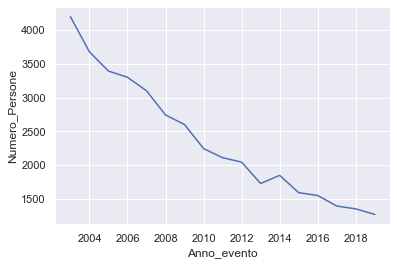

In [14]:
#creo il grafico per i cattolici
seaborn.lineplot(data=cattolici, x='Anno_evento', y='Numero_Persone');

> Anche prendendo in considerazione solo i matrimoni cattolici possiamo notare come con il passare degli anni siano drasticamente diminuiti

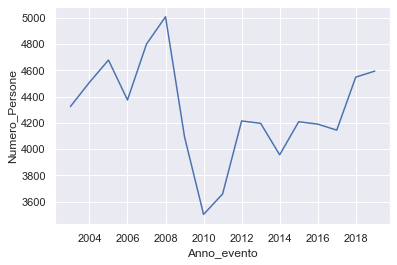

In [15]:
#creo il grafico per i civili
seaborn.lineplot(data=civili, x='Anno_evento', y='Numero_Persone');


> Analizzando i matrimoni civili invece possiamo notare che nel 2008 c'è stata una brusca diminuzione ma lentamente a partire dal 2010 hanno iniziato ad aumentare

Unendo i due grafici possiamo fare un'analisi più completa

In [16]:
#definisco il dataframe
df = data.loc[((data['Rito'] == 'Cattolico') | (data['Rito']=='Civile'))].groupby(['Anno_evento', 'Rito'])['Numero_Persone', 'Numerosità'].sum()
df

<ipython-input-16-b9eb293ac948>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = data.loc[((data['Rito'] == 'Cattolico') | (data['Rito']=='Civile'))].groupby(['Anno_evento', 'Rito'])['Numero_Persone', 'Numerosità'].sum()


Numero_Persone  Numerosità
Anno_evento Rito                                 
2003        Cattolico            4196        2098
            Civile               4324        2162
2004        Cattolico            3676        1838
            Civile               4508        2254
2005        Cattolico            3392        1696
            Civile               4678        2339
2006        Cattolico            3300        1650
            Civile               4374        2187
2007        Cattolico            3100        1550
            Civile               4800        2400
2008        Cattolico            2742        1371
            Civile               5008        2504
2009        Cattolico            2600        1300
            Civile               4092        2046
2010        Cattolico            2244        1122
            Civile               3502        1751
2011        Cattolico            2110        1055
            Civile               3658        1829
2012        Cattolico            2044        1022
            Civile               4214        2107
2013        Cattolico            1728         864
            Civile               4196        2098
2014        Cattolico            1848         924
            Civile               3956        1978
2015        Cattolico            1592         796
            Civile               4208        2104
2016        Cattolico            1550         775
            Civile               4190        2095
2017        Cattolico            1394         697
            Civile               4144        2072
2018        Cattolico            1352         676
            Civile               4548        2274
2019        Cattolico            1270         635
            Civile               4594        2297

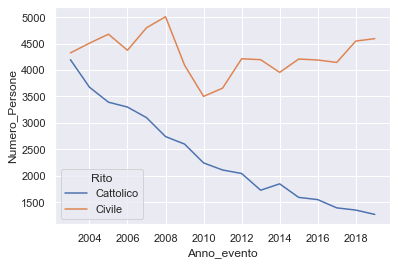

In [17]:
#creo il grafico
seaborn.lineplot(data=df ,x='Anno_evento', y='Numero_Persone',hue="Rito");

> Analizzando i matrimoni civili e cattolici simultaneamente notiamo che i matrimoni civili dall'inizio della raccolta dei dati ( ovvero dal 2003 ) sono in numero maggiore rispetto ai matrimoni effettuati con rito cattolico e non solo hanno avuto una diminuzione a partire dal 2008 minore rispetto ai matrimoni cattolici ma dal 2010, nonostante le persone che si sposano con rito cattolico continuano a diminuire drasticamente, i matrimoni civili iniziano ad aumentare.

Prendiamo in considerazione ora le nazionalità delle persone sposate

In [56]:
citt_marito= data.groupby(['Cittadinanza_marito']).sum()
citt_marito.drop(['Anno_evento', 'Eta_marito','Eta_moglie','Numerosità'],inplace=True, axis=1)

citt_moglie= data.groupby(['Cittadinanza_moglie']).sum()
citt_moglie.drop(['Anno_evento', 'Eta_marito','Eta_moglie','Numerosità'],inplace=True, axis=1)

display(citt_moglie,citt_marito)

,Numero_Persone
Cittadinanza_moglie,
Albania,1076
Algeria,24
Angola,6
Arabia Saudita,2
Argentina,240
...,...
Venezuela,178
Vietnam,14
Zambia,4


,Numero_Persone
Cittadinanza_marito,
Afghanistan,10
Albania,758
Algeria,96
Angola,6
Apolide,2
...,...
Vietnam,2
Yemen,4
Zambia,4


> Vogliamo sapere quante persone con cittadinanza non italiana si sono sposate a Milano

In [64]:
a = citt_marito.query("Cittadinanza_marito != 'Italia'")
b = citt_moglie.query("Cittadinanza_moglie != 'Italia'")
p1= a['Numero_Persone'].sum()
p2 = b['Numero_Persone'].sum()

print("Le persone con cittadinanza non Italiana sposate a Milano fra il 2003 e il 2019 sono pari a:", p1+p2)

Le persone con cittadinanza non Italiana sposate a Milano fra il 2003 e il 2019 sono pari a: 46664
